# **Proyek Analisis Data: Bike Sharing Dataset**
- **Nama:** Salsabila Balqis
- **Email:** salsabilabalqis1012@gmail.com
- **ID Dicoding:** salsabilabalqis14

## **Menentukan Pertanyaan Bisnis**

1. 	Bagaimana tren jumlah penyewaan pada setiap musim?
2.  Bagaimana distribusi penyewaan sepeda pada berbagai bulan sepanjang tahun?
3.  Bagaimana pola penyewaan sepeda dalam seminggu?
4.	Pada jam berapa jumlah penyewaan sepeda paling tinggi dan paling rendah?
5.  Bagaimana pola penyewaan pada hari kerja dibandingkan akhir pekan?
6.	Bagaimana pola penyewaan pada hari kerja dibandingkan hari libur?
7.  Bagaimana pola penyewaan terhadap kondisi cuaca?

## **Import Semua Packages/Library yang Digunakan**

In [65]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

## **Data Wrangling**

### **Gathering Data**

In [66]:
dataset = pd.read_csv('https://drive.google.com/uc?id=1fEuQsgCwy7CINs7mjcc6WYgMwldiLuCH')
dataset

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,17375,2012-12-31,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,11,108,119
17375,17376,2012-12-31,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,8,81,89
17376,17377,2012-12-31,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,7,83,90
17377,17378,2012-12-31,1,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,13,48,61


#### **Insight:**
- Dataset yang digunakan terdiri dari 17 kolom dan 17379 baris data
- Adapun 17 kolom tersebut, yaitu:
    *   `instant` : Record index
    *   `dteday` : Date
    *   `season` : Season (1:springer, 2:summer, 3:fall, 4:winter)
    *   `yr` : Year (0: 2011, 1:2012)
    *   `mnth` : Month (1 to 12)
    *   `hr` : Hour (0 to 23)
    *   `holiday` : Weather day is holiday or not
    *   `weekday` : Day of the week
    *   `workingday` : If day is neither weekend nor holiday is 1, otherwise is 0
    *   `weathersit` :
          - `1`: Clear, Few clouds, Partly cloudy, Partly cloudy
          - `2`: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
          - `3`: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
          - `4`: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
    *   `temp` : Normalized temperature in Celsius. The values are divided to 41 (max)
    *   `atemp` : Normalized feeling temperature in Celsius. The values are divided to 50 (max)
    *   `hum` : Normalized humidity. The values are divided to 100 (max)
    *   `windspeed` : Normalized wind speed. The values are divided to 67 (max)
    *   `casual` : Count of casual users
    *   `registerd` : Count of registered users
    *   `cnt` : Count of total rental bikes including both casual and registered

###**Assessing Data**

In [67]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [68]:
print("Jumlah duplikasi: ", dataset.duplicated().sum())

Jumlah duplikasi:  0


In [69]:
dataset.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


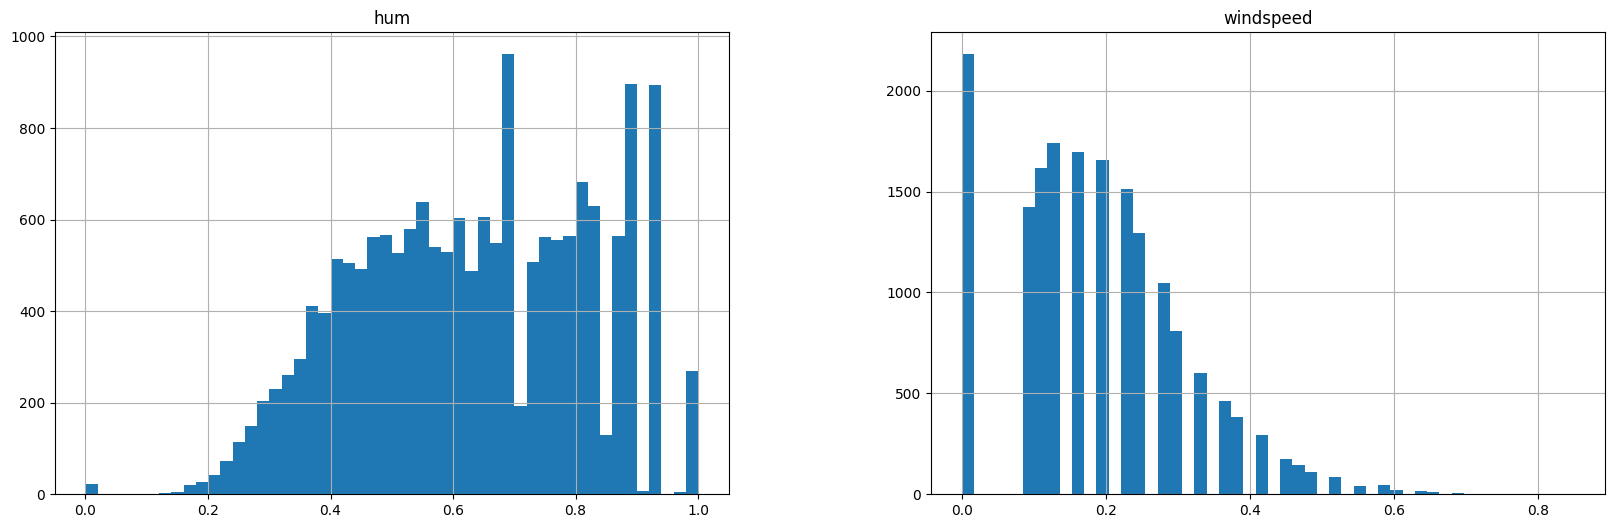

In [70]:
dataset[['hum', 'windspeed']].hist(bins=50, figsize=(20,6))
plt.show()

#### **Insight:**
- Kolom `instant`, `dteday`, `yr` akan dihapus karena tidak memberikan informasi yang berguna atau relevan dalam konteks analisis
- Kolom `season`, `mnth`, `hr`, `holiday`, `weekday`, `workingday`, dan `weathersit` perlu diubah menjadi tipe data kategori agar lebih sesuai untuk kebutuhan analisis.
- Tidak ditemukan nilai yang hilang dan duplikasi data pada dataset
- Terdapat kejanggalan pada nilai minimum di kolom `hum` dan `windspeed`, yang mana hal ini didukung oleh hasil distribusi data yang menunjukkan kemungkinan besar adanya nilai yang tidak akurat pada kolom tersebut.


### **Cleaning Data**

#### **Menghapus kolom**

In [71]:
# Menghapus kolom 'instant', 'dteday', dan 'yr'
dataset = dataset.drop(['instant', 'dteday', 'yr'], axis=1)

#### **Mengubah tipe data**

In [72]:
# Mengubah tipe data kolom yang ditentukan menjadi kategori
cols_to_convert = ['season', 'mnth', 'hr', 'holiday', 'weekday', 'workingday', 'weathersit']

for col in cols_to_convert:
    dataset[col] = dataset[col].astype('category')

In [73]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   season      17379 non-null  category
 1   mnth        17379 non-null  category
 2   hr          17379 non-null  category
 3   holiday     17379 non-null  category
 4   weekday     17379 non-null  category
 5   workingday  17379 non-null  category
 6   weathersit  17379 non-null  category
 7   temp        17379 non-null  float64 
 8   atemp       17379 non-null  float64 
 9   hum         17379 non-null  float64 
 10  windspeed   17379 non-null  float64 
 11  casual      17379 non-null  int64   
 12  registered  17379 non-null  int64   
 13  cnt         17379 non-null  int64   
dtypes: category(7), float64(4), int64(3)
memory usage: 1.0 MB


#### **Menangani inaccurate value**

**kolom hum**

In [74]:
dataset['hum'].value_counts()[0]

22

In [75]:
# Menghitung median 'hum' per kategori 'weathersit', hanya untuk hum > 0
median_humidity = dataset[dataset['hum'] > 0].groupby('weathersit')['hum'].transform(lambda x: x.median())

# Mengganti 'hum' = 0 dengan median sesuai kategori 'weathersit'
dataset['hum'] = dataset['hum'].where(dataset['hum'] != 0, median_humidity)

**kolom windspeed**

In [76]:
# Melihat jumlah data dengan windspeed = 0
print(dataset['windspeed'].value_counts()[0])

# Melihat distribusi windspeed = 0 berdasarkan jenis cuaca
print(dataset[dataset['windspeed'] == 0]['weathersit'].value_counts())

2180
weathersit
1    1493
2     570
3     117
4       0
Name: count, dtype: int64


- Mayoritas nilai windspeed = 0 terjadi saat kondisi cuaca weathersit menunjukkan 1 (Clear) sebanyak 1.493 data, yang dinilai masih bisa diterima karena cuaca cerah atau berawan ringan biasanya memiliki kecepatan angin yang lebih rendah. Selain itu, jumlah signifikan data dalam kondisi cuaca 2 (Misty) sebanyak 570 data juga dapat mencerminkan kelembapan tinggi dengan sedikit angin.
- Namun, terdapat 117 data dengan windspeed = 0 meskipun kondisi cuaca menunjukkan Light Snow atau Light Rain. Hal ini kurang sesuai, karena umumnya kondisi tersebut diharapkan memiliki kecepatan angin tertentu. Anomali ini dapat mengindikasikan adanya kesalahan pencatatan data atau data yang hilang/tidak lengkap.

In [77]:
# Menghitung median windspeed untuk kategori 'weathersit' = 3
median_windspeed_weathersit3 = dataset[dataset['weathersit'] == 3]['windspeed'].median()

# Mengganti 'windspeed' = 0 pada kategori 'weathersit' = 3 dengan median windspeed
dataset.loc[(dataset['windspeed'] == 0) & (dataset['weathersit'] == 3), 'windspeed'] = median_windspeed_weathersit3

In [78]:
dataset.describe()

,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.000000,17379.000000,17357.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,0.496987,0.475775,0.628024,0.191404,35.676218,153.786869,189.463088
std,0.192556,0.171850,0.191754,0.121335,49.305030,151.357286,181.387599
min,0.020000,0.000000,0.080000,0.000000,0.000000,0.000000,1.000000
25%,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


#### **Insight**
- Kolom `instant`, `dteday`, dan `yr` telah berhasil dihapus
- Kolom `season`, `mnth`, `hr`, `holiday`, `weekday`, `workingday`, dan `weathersit` telah diubah menjadi tipe data kategori
- Nilai 0 pada kolom `hum` telah disesuaikan dengan menggantinya menggunakan nilai median berdasarkan kondisi cuaca (`weathersit`). Sementara itu, nilai 0 pada kolom `windspeed` telah disesuaikan dengan menggantinya menggunakan nilai median untuk kondisi cuaca "Light Snow/Light Rain".

## **Exploratory Data Analysis (EDA)**

In [79]:
dataset.describe(include="all")

,season,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0,17379.0,17379.0,17379.0,17379.0,17379.0,17379.0,17379.000000,17379.000000,17357.000000,17379.000000,17379.000000,17379.000000,17379.000000
unique,4.0,12.0,24.0,2.0,7.0,2.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,3.0,5.0,17.0,0.0,6.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,4496.0,1488.0,730.0,16879.0,2512.0,11865.0,11413.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.496987,0.475775,0.628024,0.191404,35.676218,153.786869,189.463088
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.192556,0.171850,0.191754,0.121335,49.305030,151.357286,181.387599
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.020000,0.000000,0.080000,0.000000,0.000000,0.000000,1.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000


- Rata-rata total penyewaan sebesar 189 seped per jam, dengan penyewaan minimum 1 sepeda dan maksimum 977 sepeda dalam satu jam.
- Rata-rata penyewaan sepeda oleh casual users (pengguna tidak terdaftar) adalah sebanyak 36 sepeda, sementara rata-rata penyewaan sepeda oleh registered users (pengguna terdaftar) mencapai 154 sepeda dalam satu jam.

**Jumlah penyewaan berdasarkan musim**

In [80]:
# Mapping season
season_mapping = {1: 'Winter', 2: 'Spring', 3: 'Summer', 4: 'Fall'}

agg_seasons = dataset.groupby(dataset['season'].replace(season_mapping)).agg({
                  "casual": "sum",
                  "registered": "sum",
                  "cnt": "sum"
              }).sort_values(by="cnt", ascending=False)

agg_seasons

,casual,registered,cnt
season,,,
Summer,226091,835038,1061129
Spring,203522,715067,918589
Fall,129782,711831,841613
Winter,60622,410726,471348


- Total penyewaan tertinggi terjadi pada saat musim panas (Summer) sebanyak 1.061.129 unit, baik dari pengguna kasual maupun terdaftar. Musim semi (Spring) dan musim gugur (Fall) masing-masing berada pada posisi ke-2 dan 3, sementara itu musim dingin (Winter) memiliki penyewaan terendah sebanyak 471.348.

**Jumlah penyewaan berdasarkan bulan**

In [81]:
month_mapping = {1: 'Januari', 2: 'Februari', 3: 'Maret', 4: 'April', 5: 'Mei', 6: 'Juni', 7: 'Juli', 8: 'Agustus', 9: 'September', 10: 'Oktober', 11: 'November', 12: 'Desember'}

agg_month = dataset.groupby(dataset['mnth'].replace(month_mapping)).agg({
                "casual": "sum",
                "registered": "sum",
                "cnt": "sum"
            }).sort_values(by="cnt", ascending=False)

agg_month

,casual,registered,cnt
mnth,,,
Agustus,72039,279155,351194
Juni,73906,272436,346342
September,70323,275668,345991
Juli,78157,266791,344948
Mei,75285,256401,331686
Oktober,59760,262592,322352
April,60802,208292,269094
November,36603,218228,254831
Maret,44444,184476,228920


- Bulan Agustus, Juni, dan September menunjukkan jumlah penyewaan tertinggi, yang bertepatan dengan musim panas dan awal musim gugur. Sementara itu, penyewaan terendah terjadi di musim dingin (Desember- Februari), dimana Januari menunjukkan jumlah penyewaan paling sedikit.

**Jumlah penyewaan berdasarkan hari**

In [82]:
weekday_mapping = {0: 'Minggu', 1: 'Senin', 2: 'Selasa', 3: 'Rabu', 4: 'Kamis', 5: 'Jum\'at', 6: 'Sabtu'}

agg_weekday = dataset.groupby(dataset['weekday'].replace(weekday_mapping)).agg({
                  "casual": "sum",
                  "registered": "sum",
                  "cnt": "sum"
              })

agg_weekday

,casual,registered,cnt
weekday,,,
Minggu,140521,303506,444027
Senin,70784,384719,455503
Selasa,57843,411266,469109
Rabu,57319,415729,473048
Kamis,61460,423935,485395
Jum'at,78238,409552,487790
Sabtu,153852,323955,477807


-	Hari kerja (Senin-Jumat) memiliki jumlah penyewaan yang cukup merata, tetapi puncak penyewaan tertinggi terjadi pada Kamis dan Jumat. Sementara itu, pada akhir pekan terutama hari Sabtu, terjadi peningkatan signifikan dalam penyewaan oleh pengguna kasual.

**Jumlah penyewaan berdasarkan jam**

In [83]:
agg_hour = dataset.groupby(dataset['hr']).agg({
                "casual": "sum",
                "registered": "sum",
                "cnt": "sum"
            }).sort_values(by="cnt", ascending=False)

agg_hour

,casual,registered,cnt
hr,,,
17,54220,282640,336860
18,44496,265276,309772
8,15761,245240,261001
16,53834,173914,227748
19,35505,191284,226789
13,52713,132206,184919
12,49718,134696,184414
15,54606,128543,183149
14,55089,120563,175652


-	Total penyewaan tertinggi terjadi pada pagi hari dengan puncak penyewaan tertinggi terjadi pada jam 07.00 dan sore hari (16.00 – 18.00) dengan penyewaan terbanyak terjadi pada jam 17.00. Penyewaan oleh pengguna terdaftar didominasi pada jam 07.00 – 09.00 dan 16.00 – 18.00, sementara itu pengguna kasula cenderung lebih tinggi pada jam siang hingga sore hari (10.00 – 16.00).

**Jumlah penyewaan pada hari libur**

In [84]:
holiday_mapping = {0: 'No', 1: 'Yes'}

agg_holiday = dataset.groupby(dataset['holiday'].replace(holiday_mapping)).agg({
                  "casual": "sum",
                  "registered": "sum",
                  "cnt": "sum"
              }).sort_values(by="cnt", ascending=False)

agg_holiday

,casual,registered,cnt
holiday,,,
No,597658,2616586,3214244
Yes,22359,56076,78435


-	Jumlah penyewaan pada hari biasa jauh lebih tinggi dibandingkan dengan hari libur, di mana pengguna terdaftar mendominasi hari biasa dengan 2.616.586 penyewaan dibandingkan dengan hanya 56.076 pada hari libur. Sementara itu, pengguna kasual juga lebih banyak pada hari biasa, namun dengan proporsi yang lebih kecil dibandingkan pengguna terdaftar.

**Jumlah penyewaan pada hari kerja**

In [85]:
workingday_mapping = {0: 'No', 1: 'Yes'}

agg_workingday = dataset.groupby(dataset['workingday'].replace(workingday_mapping)).agg({
                      "casual": "sum",
                      "registered": "sum",
                      "cnt": "sum"
                  }).sort_values(by="cnt", ascending=False)

agg_workingday

,casual,registered,cnt
workingday,,,
Yes,303285,1989125,2292410
No,316732,683537,1000269


-	Penyewaan pada hari kerja lebih tinggi dibandingkan dengan akhir pekan, di mana pengguna terdaftar mendominasi di hari kerja, sementara itu pengguna kasual lebih banyak di akhir pekan.

**Jumlah penyewaan berdasarkan kondisi cuaca**

In [86]:
weathersit_mapping = {1: 'Clear', 2: 'Misty', 3: 'Light Snow, Light Rain', 4: 'Heavy Rain, Snow'}

agg_weathersit = dataset.groupby(dataset['weathersit'].replace(weathersit_mapping)).agg({
                      "hum": ["min", "max"],
                      "temp": ["min", "max"],
                      "windspeed": ["min", "max"],
                      "cnt": "sum"
                  })

agg_weathersit

hum        temp       windspeed              cnt
                         min   max   min   max       min     max      sum
weathersit                                                               
Clear                   0.08  1.00  0.02  1.00    0.0000  0.8060  2338173
Misty                   0.18  1.00  0.02  0.96    0.0000  0.7164   795952
Light Snow, Light Rain  0.35  1.00  0.08  0.92    0.0896  0.8507   158331
Heavy Rain, Snow        0.86  0.93  0.14  0.22    0.0896  0.3284      223

-	Sebagian besar penyewaan terjadi saat cuaca cerah, dan penyewaan masih cukup tinggi saat cuaca berkabut (Misty). Namun, penyewaan menurun drastis dalam kondisi hujan ringan atau salju ringan. Pada kondisi hujan lebat atau salju lebat, hanya terdapat 223 penyewaan, yang menunjukkan bahwa cuaca buruk secara signifikan menghambat aktivitas penyewaan.


## **Visualization & Explanatory Analysis**

### **Bagaimana tren jumlah penyewaan pada setiap musim?**

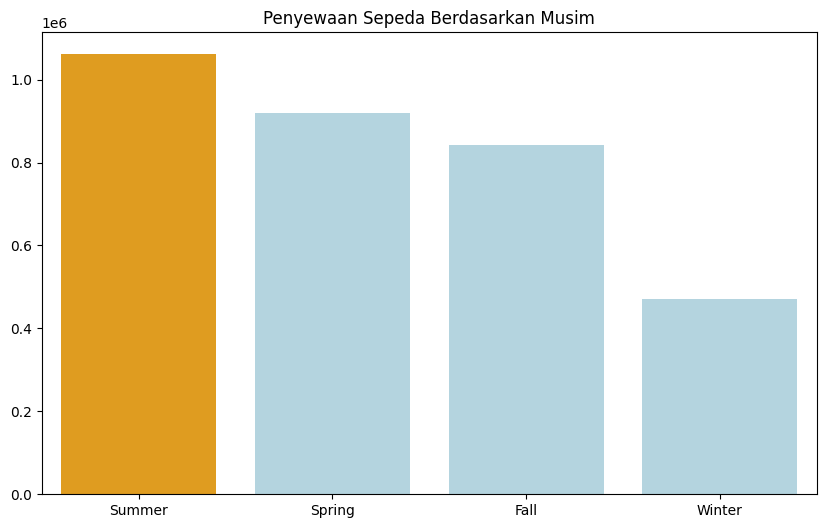

In [87]:
seasons = agg_seasons.index.tolist()
total = agg_seasons["cnt"].values

colors = ['lightblue'] * len(total)
index_max = np.argmax(total)
colors[index_max] = 'orange'

plt.figure(figsize=(10, 6))
sns.barplot(x=seasons, y=total, palette=colors)
plt.title("Penyewaan Sepeda Berdasarkan Musim")
plt.xlabel(None)
plt.ylabel(None)
plt.xticks()
plt.show()

**Insight:**
- Berdasarkan hasil visualisasi di atas, terlihat bahwa musim panas (Summer) menunjukkan jumlah penyewaan tertinggi dibandingkan musim lainnya. Penyewaan secara signifikan selama musim panas bisa disebabkan oleh cuaca yang lebih nyaman untuk bersepeda. Sementara itu, musim dingin (Winter) memiliki total penyewaan terendah yang kemungkinan karena kondisi cuaca yang kurang mendukung seperti suhu dingin dan hujan/salju.

### **Bagaimana distribusi penyewaan sepeda pada berbagai bulan sepanjang tahun?**

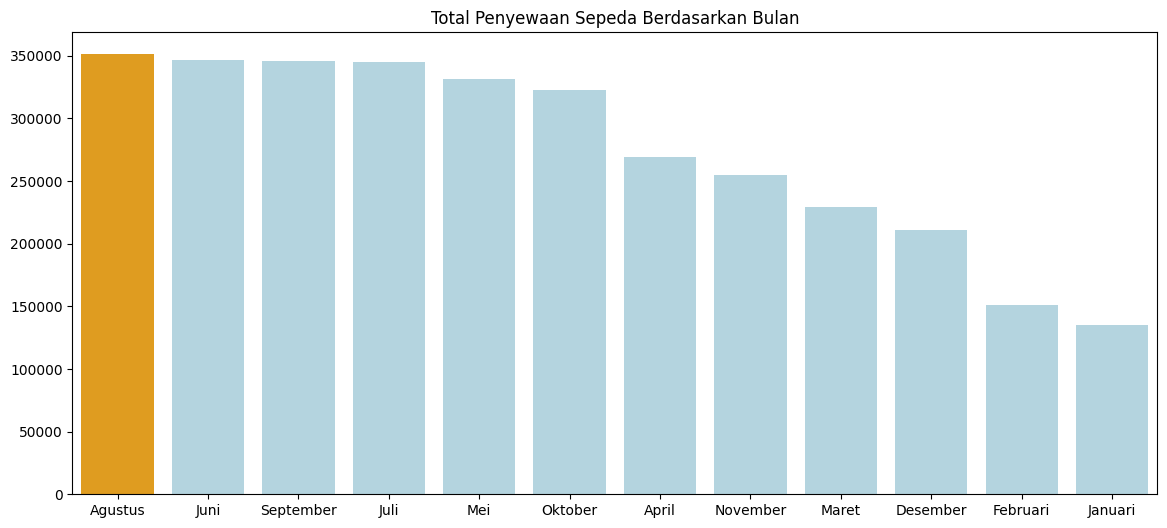

In [88]:
month = agg_month.index.tolist()
total_month = agg_month["cnt"].values

colors = ['lightblue'] * len(total_month)
index_max = np.argmax(total_month)
colors[index_max] = 'orange'

plt.figure(figsize=(14, 6))
sns.barplot(x=month, y=total_month, palette=colors)
plt.title('Total Penyewaan Sepeda Berdasarkan Bulan')
plt.xlabel(None)
plt.ylabel(None)
plt.show()

**Insight:**
- Hasil visualisasi di atas menunjukkan bahwa bulan Agustus menunjukkan jumlah penyewaan tertinggi, yang mana pada bulan ini bertepatan dengan musim panas. Sementara itu, penyewaan terendah terjadi di musim dingin, yaitu pada bulan Desember, Januari, dan Februari yang kemungkinan disebabkan oleh kondisi cuaca yang lebih dingin, hujan, atau salju yang membuat bersepeda kurang nyaman atau bahkan tidak mungkin dilakukan.

### **Bagaimana pola penyewaan sepeda dalam seminggu?**

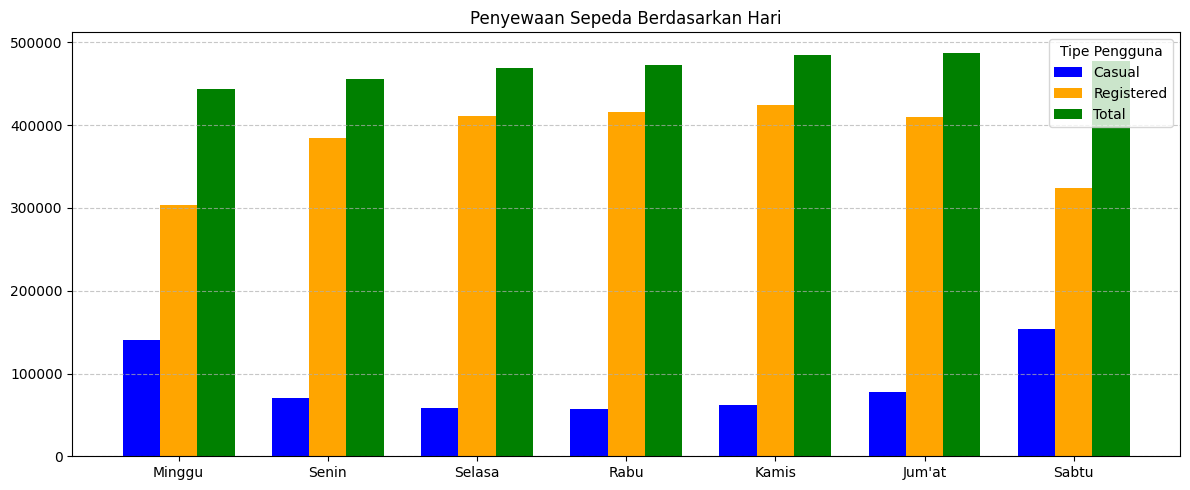

In [89]:
weekday = agg_weekday.index.tolist()
casual = agg_weekday["casual"].values
registered = agg_weekday["registered"].values
total = agg_weekday["cnt"].values

bar_width = 0.25
x = np.arange(len(weekday))

plt.figure(figsize=(12, 5))
plt.bar(x - bar_width, casual, width=bar_width, label="Casual", color="blue")
plt.bar(x, registered, width=bar_width, label="Registered", color="orange")
plt.bar(x + bar_width, total, width=bar_width, label="Total", color="green")

plt.xlabel(None)
plt.ylabel(None)
plt.title("Penyewaan Sepeda Berdasarkan Hari")
plt.xticks(x, weekday)
plt.legend(title="Tipe Pengguna")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()

**Insight:**
- Berdasarkan hasil visualisasi bar chart di atas, terlihat bahwa pada akhir pekan (Sabtu dan Minggu) memiliki kontribusi lebih besar penyewaan dari pengguna casual dibandingkan pada hari kerja. Sebaliknya, pada hari kerja (Senin-Jum'at), penyewaan oleh pengguna registered mendominasi yang kemungkinan besar digunakan untuk keperluan transportasi sehari-hari seperti bekerja atau sekolah.

### **Pada jam berapa jumlah penyewaan sepeda paling tinggi dan paling rendah?**

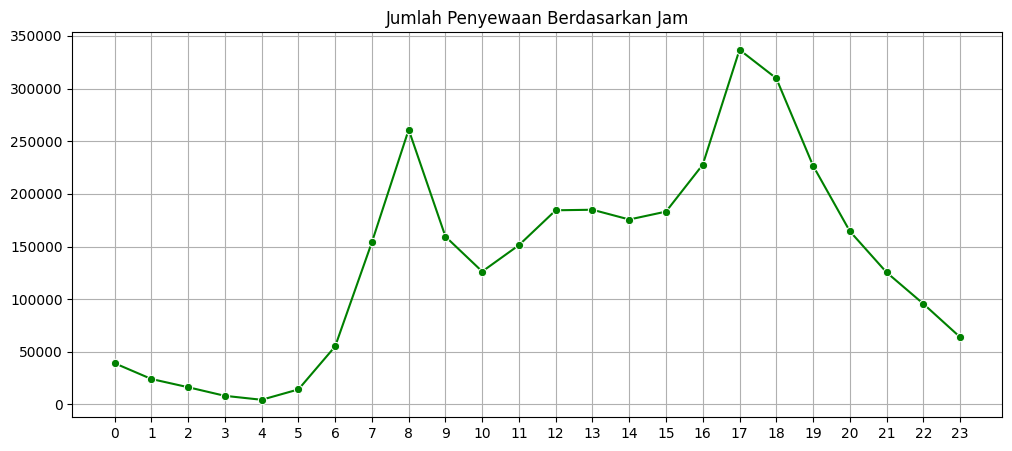

In [90]:
hours = agg_hour.index.tolist()
total = agg_hour["cnt"].values

plt.figure(figsize=(12, 5))
sns.lineplot(x=hours, y=total, marker='o', color='green')
plt.title('Jumlah Penyewaan Berdasarkan Jam')
plt.xlabel(None)
plt.ylabel(None)
plt.xticks(range(0, 24))
plt.grid(True)
plt.show()

**Insight:**
- Berdasarkan hasil visualisasi di atas, dapat diketahui bahwa puncak penyewaan terjadi pada jam 08.00 dan 17.00 yang mencerminkan penggunaan sepeda untuk perjalanan ke dan dari tempat kerja/sekolah. Jumlah penyewaan terendah terjadi antara jam 02.00–05.00 ketika aktivitas umumnya sangat minim.

### **Bagaimana pola penyewaan pada hari kerja dibandingkan akhir pekan?**

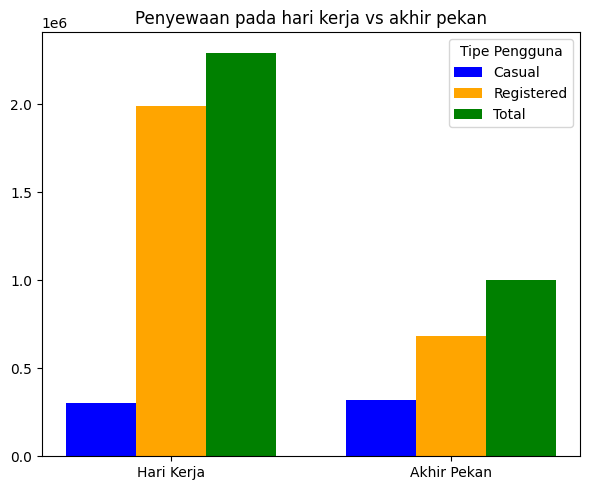

In [91]:
workingday = agg_workingday.index.tolist()
casual = agg_workingday["casual"].values
registered = agg_workingday["registered"].values
total = agg_workingday["cnt"].values

workingday = ['Hari Kerja' if x == 'Yes' else 'Akhir Pekan' for x in workingday]

bar_width = 0.25
x = np.arange(len(workingday))

plt.figure(figsize=(6, 5))
plt.bar(x - bar_width, casual, width=bar_width, label="Casual", color="blue")
plt.bar(x, registered, width=bar_width, label="Registered", color="orange")
plt.bar(x + bar_width, total, width=bar_width, label="Total", color="green")

plt.xlabel(None)
plt.ylabel(None)
plt.title("Penyewaan pada hari kerja vs akhir pekan")
plt.xticks(x, workingday)
plt.legend(title="Tipe Pengguna")
plt.tight_layout()
plt.show()

**Insight:**
- Hasil visualisasi di atas menunjukkan bahwa pada hari kerja, penyewaan oleh pengguna registered jauh lebih dominan, sedangkan pengguna casual lebih aktif di akhir pekan. Total penyewaan pada hari kerja lebih tinggi dibandingkan akhir pekan, menunjukkan bahwa sepeda banyak digunakan untuk keperluan harian.

### **Bagaimana pola penyewaan pada hari libur dibandingkan hari kerja?**

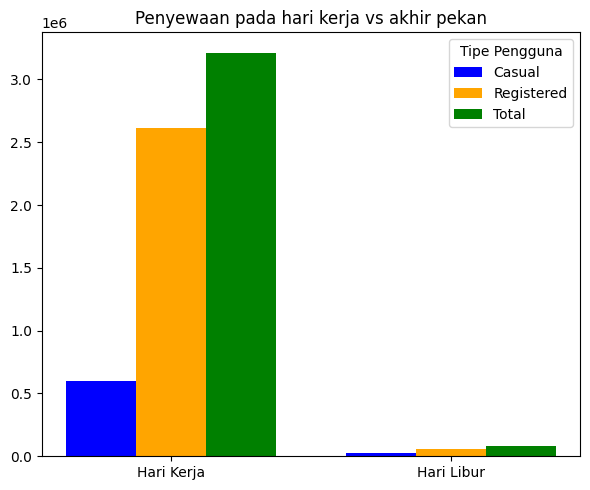

In [92]:
holiday = agg_holiday.index.tolist()
casual = agg_holiday["casual"].values
registered = agg_holiday["registered"].values
total = agg_holiday["cnt"].values

holiday = ['Hari Libur' if x == 'Yes' else 'Hari Kerja' for x in holiday]

bar_width = 0.25
x = np.arange(len(holiday))

plt.figure(figsize=(6, 5))
plt.bar(x - bar_width, casual, width=bar_width, label="Casual", color="blue")
plt.bar(x, registered, width=bar_width, label="Registered", color="orange")
plt.bar(x + bar_width, total, width=bar_width, label="Total", color="green")

plt.xlabel(None)
plt.ylabel(None)
plt.title("Penyewaan pada hari kerja vs akhir pekan")
plt.xticks(x, holiday)
plt.legend(title="Tipe Pengguna")
plt.tight_layout()
plt.show()

**Insight:**
- Berdasarkan visualisasi di atas terlihat bahwa penyewaan sepeda pada hari libur jauh lebih rendah dibandingkan hari kerja, baik untuk pengguna casual maupun registered. Hal ini mencerminkan bahwa sebagian besar penyewaan terjadi untuk keperluan rutin bukan rekreasi.

### **Bagaimana pola penyewaan terhadap berbagai kondisi cuaca?**

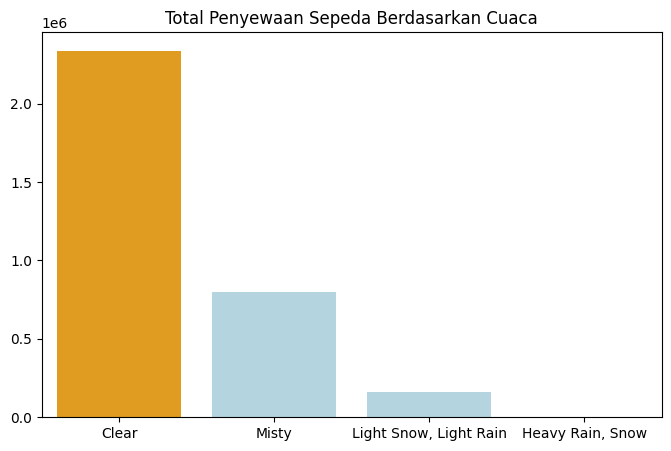

In [93]:
weathersit = agg_weathersit.index.tolist()
total_weathersit = agg_weathersit["cnt"].values.flatten()

colors = ['lightblue'] * len(total_weathersit)
index_max = np.argmax(total_weathersit)
colors[index_max] = 'orange'

plt.figure(figsize=(8, 5))
sns.barplot(x=weathersit, y=total_weathersit, palette=colors)
plt.title('Total Penyewaan Sepeda Berdasarkan Cuaca')
plt.xlabel(None)
plt.ylabel(None)
plt.xticks()
plt.show()

**Insight:**
- Berdasarkan hasil visualisasi di atas terlihat jelas bahwa kondisi cuaca Clear memiliki jumlah penyewaan tertinggi, sementara cuaca Heavy Rain, Snow memiliki jumlah penyewaan terendah. Cuaca buruk secara signifikan mengurangi jumlah penyewaan sepeda.

## **Analisis Lanjutan: Correlation Analysis**

Analisis ini bertujuan untuk mengetahui hubungan antara suhu, kelembapan, dan kecepatan angin terhadap jumlah penyewaan.

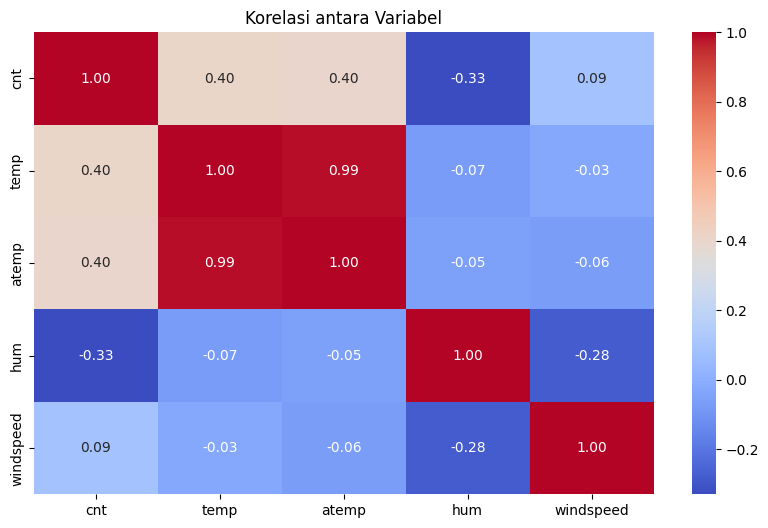

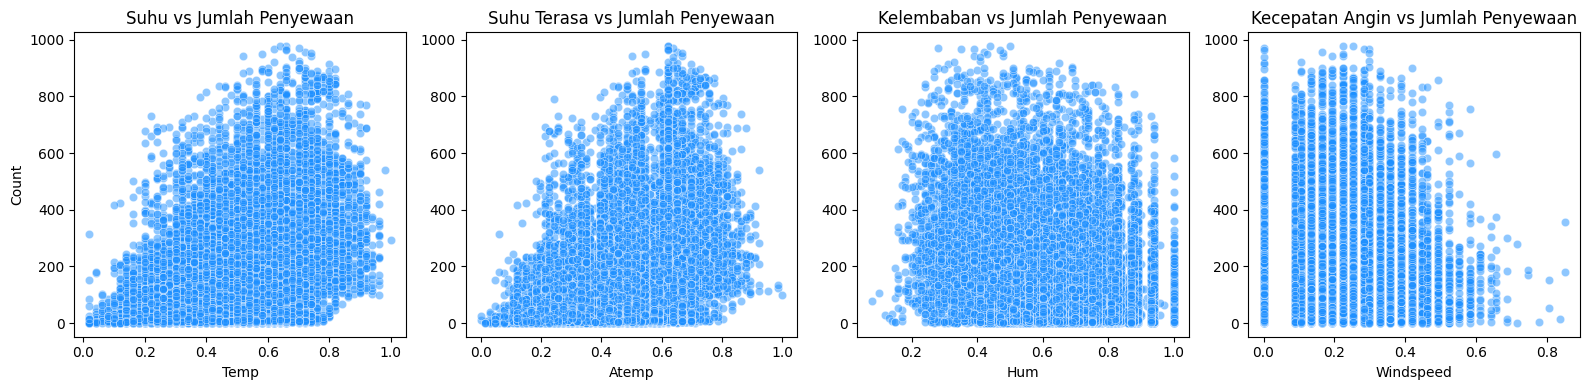

In [94]:
plt.figure(figsize=(10, 6))
sns.heatmap(dataset[['cnt', 'temp', 'atemp', 'hum', 'windspeed']].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Korelasi antara Variabel')
plt.show()

features = ['temp', 'atemp', 'hum', 'windspeed']
titles = ['Suhu vs Jumlah Penyewaan', 'Suhu Terasa vs Jumlah Penyewaan', 'Kelembaban vs Jumlah Penyewaan', 'Kecepatan Angin vs Jumlah Penyewaan']

plt.figure(figsize=(16, 4))
for i, feature in enumerate(features):
    plt.subplot(1, 4, i + 1)
    sns.scatterplot(
        x=feature,
        y='cnt',
        data=dataset,
        alpha=0.5,
        color='dodgerblue'
    )
    plt.title(titles[i])
    plt.xlabel(feature.capitalize())
    plt.ylabel('Count' if i == 0 else '')

plt.tight_layout()
plt.show()

**Insight:**
- Hubungan antara suhu (`temp` dan `atemp`) dengan jumlah penyewaan sepeda (`cnt`) menunjukkan korelasi positif sebesar 0,4. Ini berarti bahwa semakin tinggi suhu, jumlah penyewaan sepeda cenderung meningkat.
- Sebaliknya, hubungan antara kelembapan (`hum`) dengan jumlah penyewaan sepeda menunjukkan korelasi negatif sebesar -0,33, yang mengindikasikan bahwa semakin tinggi tingkat kelembapan, jumlah penyewaan sepeda cenderung menurun.
- Sementara itu, hubungan antara kecepatan angin (`windspeed`) dengan jumlah penyewaan sepeda menunjukkan korelasi yang sangat lemah, yaitu sebesar 0,09. Hal ini menunjukkan bahwa kecepatan angin tidak memiliki pengaruh yang signifikan terhadap jumlah penyewaan sepeda

## **Conclusion**

- Musim panas (Summer) menunjukkan jumlah penyewaan tertinggi. Sementara itu, musim dingin (Winter) memiliki total penyewaan terendah.
- Bulan Agustus menunjukkan jumlah penyewaan tertinggi yang bertepatan dengan musim panas. Sementara itu, penyewaan terendah terjadi di musim dingin, yaitu pada bulan Desember, Januari, dan Februari.
- Penyewaan oleh pengguna casual pada akhir pekan lebih tinggi dibandingkan hari kerja, sedangkan penyewaan oleh pengguna registered mendominasi pada hari kerja.
- Puncak penyewaan tertinggi terjadi pada jam 08.00 dan 17.00, sementara itu jumlah penyewaan terendah terjadi antara jam 02.00 hingga 05.00.
- Total penyewaan pada hari kerja lebih tinggi dibandingkan akhir pekan, dengan penyewaan oleh pengguna registered jauh lebih dominan pada hari kerja, sedangkan pengguna casual lebih aktif di akhir pekan.
- Penyewaan sepeda pada hari libur jauh lebih rendah dibandingkan hari kerja, baik untuk pengguna casual maupun registered.
- Kondisi cuaca Clear memiliki jumlah penyewaan tertinggi, sementara cuaca Heavy Rain atau Snow memiliki jumlah penyewaan terendah.
- Suhu udara memiliki korelasi positif dengan jumlah penyewaan sepeda, sementara kelembaban menunjukkan korelasi negatif. Di sisi lain, kecepatan angin memiliki korelasi yang sangat lemah terhadap jumlah penyewaan.